In [1]:
import numpy as np
from PIL import Image

import seam_carving

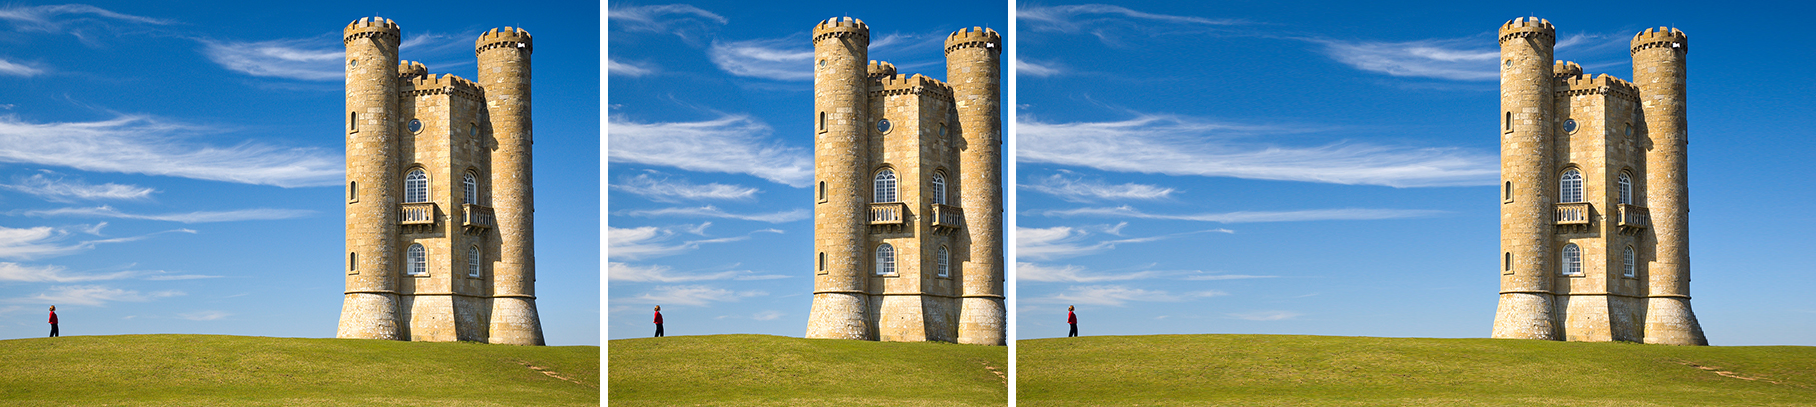

In [2]:
# scaling up and down
src = np.asarray(Image.open("../fig/castle.jpg"))
h, w, c = src.shape
scale_down = seam_carving.resize(src, (w - 200, h))
scale_up = seam_carving.resize(src, (w + 200, h))
padding = np.full((h, 8, c), 255, dtype=np.uint8)
Image.fromarray(np.hstack((src, padding, scale_down, padding, scale_up)))

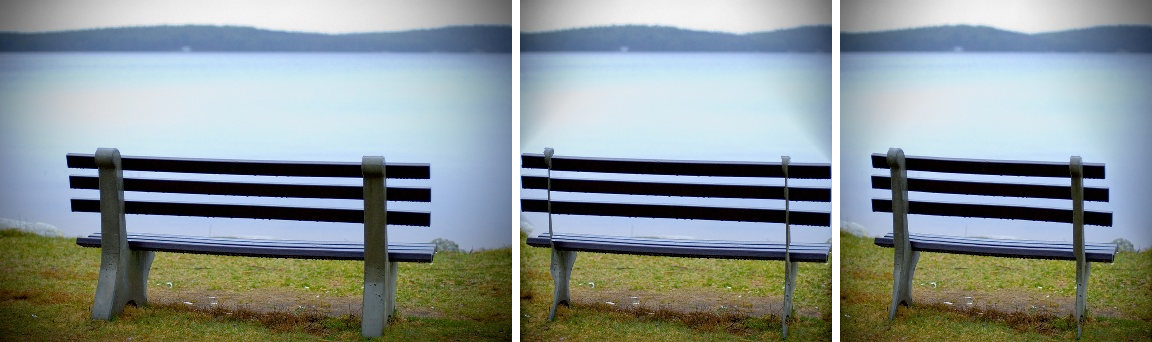

In [3]:
# forward energy vs backward energy
src = np.asarray(Image.open("../fig/bench.jpg"))
h, w, c = src.shape
backward = seam_carving.resize(src, (w - 200, h))
forward = seam_carving.resize(src, (w - 200, h), energy_mode="forward")
padding = np.full((h, 8, c), 255, dtype=np.uint8)
Image.fromarray(np.hstack((src, padding, backward, padding, forward)))

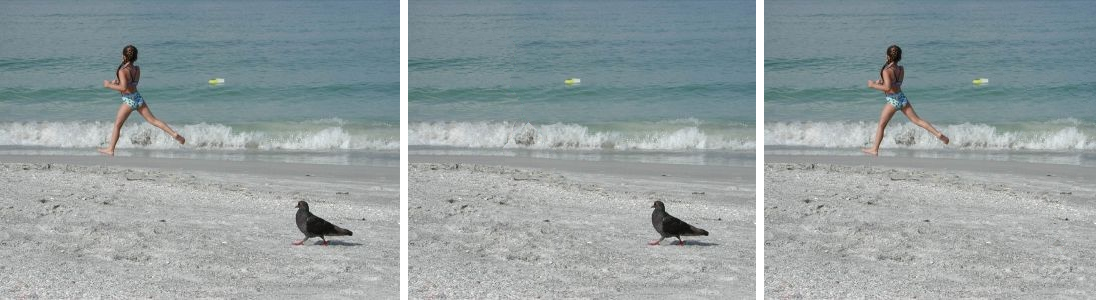

In [4]:
# object removal
src = np.asarray(Image.open("../fig/beach.jpg"))
h, w, c = src.shape
girl_mask = np.asarray(Image.open("../fig/beach_girl.png").convert("L"))
girl_removed = seam_carving.resize(src, drop_mask=girl_mask)
bird_mask = np.asarray(Image.open("../fig/beach_bird.png").convert("L"))
bird_removed = seam_carving.resize(src, drop_mask=bird_mask)
padding = np.full((h, 8, c), 255, dtype=np.uint8)
Image.fromarray(np.hstack((src, padding, girl_removed, padding, bird_removed)))